<div style="text-align: center;"> <h3>Exploratory Data Analysis</h3>
<h5>Formative Assessment 1</h5>
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("cytof_one_experiment.csv")
print("Shape: ", df.shape)
df.info()

Shape:  (50000, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NKp30          50000 non-null  float64
 1   KIR3DL1        50000 non-null  float64
 2   NKp44          50000 non-null  float64
 3   KIR2DL1        50000 non-null  float64
 4   GranzymeB      50000 non-null  float64
 5   CXCR6          50000 non-null  float64
 6   CD161          50000 non-null  float64
 7   KIR2DS4        50000 non-null  float64
 8   NKp46          50000 non-null  float64
 9   NKG2D          50000 non-null  float64
 10  NKG2C          50000 non-null  float64
 11  X2B4           50000 non-null  float64
 12  CD69           50000 non-null  float64
 13  KIR3DL1.S1     50000 non-null  float64
 14  CD2            50000 non-null  float64
 15  KIR2DL5        50000 non-null  float64
 16  DNAM.1         50000 non-null  float64
 17  CD4            50000 non-null 

## Univariate Graph

For this part, we shall make **Density Estimate Graph** and **Quantile Graph**. Before choosing which column to use, let us explore the data first so that we can make an educated guess as to which column to pick for what graph. Let us start with these goals in mind:

**Density Estimate Graph**
1. The column must be continous.
2. The range of possible values should be relatively low.

**Quantile Graph**
1. Discrete Data would be good here (optional)
2. Have significant outliers
3. Have relatively high peak (kurtosis).

In [61]:
range_for_each = df.apply(["min", "max"]).T
range_for_each['range'] = range_for_each['max'] - range_for_each['min']
range_for_each = range_for_each.sort_values(by="range", ascending=False)
range_for_each.head()

,min,max,range
Perforin,-0.618880,9.613937,10.232817
CD56,-0.644959,9.266580,9.911539
TNFa,-0.673917,8.229040,8.902956
CD107a,-0.673891,8.191875,8.865767
NKG2A,-0.673278,8.144804,8.818082


Looks like all of the columns have relatively small range with `Perforin` at the top with a range of around 10.23.

Im looking for range of around 6, let's see what we could find.

In [66]:
mask = (range_for_each['range'] < 7) & (range_for_each['range'] > 6)
range_for_each[mask]

,min,max,range
KIR3DL1.S1,-0.673896,6.261324,6.935220
GranzymeB,-0.671950,6.184686,6.856635
KIR2DL2.L3.S2,-0.673891,5.872892,6.546783
KIR2DL5,-0.673841,5.721196,6.395037
CD161,-0.673832,5.697105,6.370937


Alright, let's pick `KIR2DL5` column for our **Density Estimate Graph**
### Density Estimate Graph

In [15]:
sns.set_theme(style="whitegrid", palette="pastel")

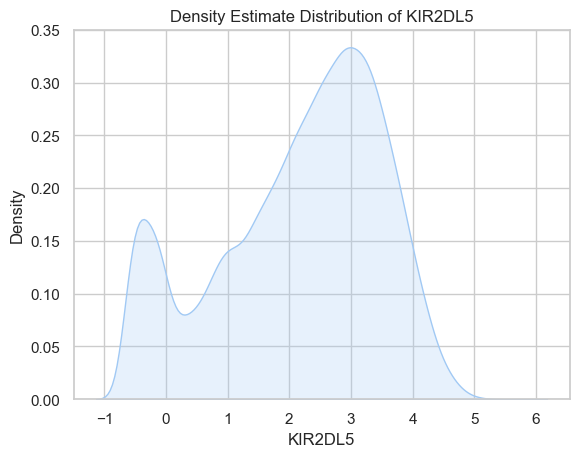

In [67]:
sns.kdeplot(df['KIR2DL5'], fill=True)
plt.title("Density Estimate Distribution of KIR2DL5");

The `Density Estimate Distribution of KIR2DL5` gives us a clear view of the distribution of data in the column `KIR2DL5` of our CyTops dataset.

1. **Range**: Assuming we haven't done any numerical analysis of the column, it is not clear the specifics but the values apear to range from -1 to 5, which makes the its range=6 (this aligns with our previous analyis!!). Without the context of the data, and column, it is not clear if -1 is a true value, an error, or a null placeholder.
2. **Mode**: Looking at the peak of our graph, around 33% of all distributions fall under *KIR2DL5=3*.
3. **Bimodality**: It appears that there are two modes. One is the primary mentioned above and other is the minority right between -1 and 0 (with approximately 16% of the observations). Although further statistical analysis is needed to tell if this is significant enough for the graph to be considered bimodal (or just have a long tail).  
4. **Skewness and Normality**: Although the graph appears normally distributed, it skewed a bit to the right, which might indicate that our mean `KIR2DL5` is to the right of our mode (which is 3).

Of course we can confirm these interpretations in python.

In [49]:
print(f"Range:\n{df['KIR2DL5'].apply(['min','max'])}")
### Continous values so i rounded them to nearest int then find the frequency for each 
print(f"\nNormalize Frequency for each int values:\n{df['KIR2DL5'].round().value_counts(normalize=True)}")

print(f"\n{df['KIR2DL5'].apply(['mean', 'skew'])} \n\nMean (2.15) is to the right of mode (3). Distribution is slighly skewed to left (negative skewness).")

Range:
min   -0.673841
max    5.721196
Name: KIR2DL5, dtype: float64

Normalize Frequency for each int values:
KIR2DL5
 3.0    0.32144
 2.0    0.23618
 4.0    0.14740
 1.0    0.13508
 0.0    0.12272
-1.0    0.03024
 5.0    0.00692
 6.0    0.00002
Name: proportion, dtype: float64

mean    2.159346
skew   -0.496426
Name: KIR2DL5, dtype: float64 

Mean (2.15) is to the right of mode (3). Distribution is slighly skewed to left (negative skewness).


### Quantile Graph

To recall we have three criterias for this:
1. Discrete Data would be good here (optional)
2. Have significant outliers
3. Have relatively high peak (kurtosis).

To check for possible discrete data, let's calculate the cardinality for each columns.

In [68]:
df.nunique()

NKp30            49972
KIR3DL1          49979
NKp44            49978
KIR2DL1          49984
GranzymeB        49965
CXCR6            49973
CD161            49976
KIR2DS4          49979
NKp46            49961
NKG2D            49979
NKG2C            49981
X2B4             49984
CD69             49972
KIR3DL1.S1       49981
CD2              49979
KIR2DL5          49971
DNAM.1           49976
CD4              49963
CD8              49982
CD57             49969
TRAIL            49979
KIR3DL2          49972
MIP1b            49972
CD107a           49970
GM.CSF           49986
CD16             49960
TNFa             49979
ILT2             49974
Perforin         49952
KIR2DL2.L3.S2    49963
KIR2DL3          49979
NKG2A            49989
NTB.A            49966
CD56             49970
INFg             49972
dtype: int64

Well there goes our discrete data dream. We can't help it and also it's just optional (cause I got a feel from the df.info that not one column is discrete).

Let's proceed to the second criteria which is **significant outliers**. For this I'm thinking of either going for IQR method or just plain 99th percentile for each columns. I think it is more appropriate to proceed with IQR method (and it is more challenging!).

IQR is calculated as follows:
$$
IQR = P_{75} - P_{25}
$$

where $P_{k}$ is kth percentile.

Then the bound is commonly calculated as follows:
$$
LOWER = Q_1 - IQR*1.5 \quad \quad \quad UPPER = Q_3 + IQR*1.5
$$

where $Q_1$ and $Q_3$ is the first and third quartile.

Typically that is. But instead of 1.5 as a multiplier to outlier, let's use 3 to really get significant outliers.

$$
LOWER = Q_1 - IQR*3 \quad \quad \quad UPPER = Q_3 + IQR*3
$$

In [92]:
iqr = df.quantile([0.25, 0.75]).T
iqr['iqr'] = iqr[0.75] - iqr[0.25]
iqr['lower'] = iqr[0.25] - iqr['iqr']*3
iqr['upper'] = iqr[0.75] + iqr['iqr']*3
iqr.head()

,0.25,0.75,iqr,lower,upper
NKp30,2.823781,4.590698,1.766918,-2.476972,9.891451
KIR3DL1,-0.355146,2.154906,2.510052,-7.885303,9.685062
NKp44,-0.290356,2.643571,2.933927,-9.092137,11.445352
KIR2DL1,-0.128204,3.278196,3.406400,-10.347405,13.497397
GranzymeB,2.951438,4.242419,1.290981,-0.921505,8.115363


Let's now detect the number of outliers.

In [96]:
outliers = df[(df < iqr['lower']) | (df > iqr['upper'])].notna().sum()
outliers_only = outliers[outliers != 0]
outliers_only.sort_values(ascending=False)

DNAM.1      430
CD4         360
NTB.A       316
Perforin    280
CD16        200
CD69        122
CD56         58
CD107a        7
dtype: int64

This is a series of the number of extreme outliers for each columns (with 0 ommited).
So we got these columns as candidates. Let's proceed with the next one.

**Have relatively high peak (kurtosis)**
This is easier than the last one.

In [104]:
kurtosis = df.apply(['kurt']).T['kurt']
kurtosis = abs(kurtosis)
kurtosis.sort_values(ascending=False).head()

DNAM.1       5.702549
Perforin     4.596718
NTB.A        2.962310
CD16         2.815438
GranzymeB    1.825844
Name: kurt, dtype: float64

Ok it seems the the column `DNAM.1` passes our criteria with flying colors.

Let's now plot the *Quantile Graph* using Cleveland's quantile function.

Cleveland's quantile function involves arranging a series in ascending order and assigning each of them a corresponding, 0 < $f_i$ < 1.
$$
f_i = \frac{i - 0.5}{n} \quad \forall i \in \{ 1,2,\cdot \cdot \cdot, n \}
$$
where $n$ is the total sample space.

$f_i$ will then be used as a in input to another function, that is our arranged data.


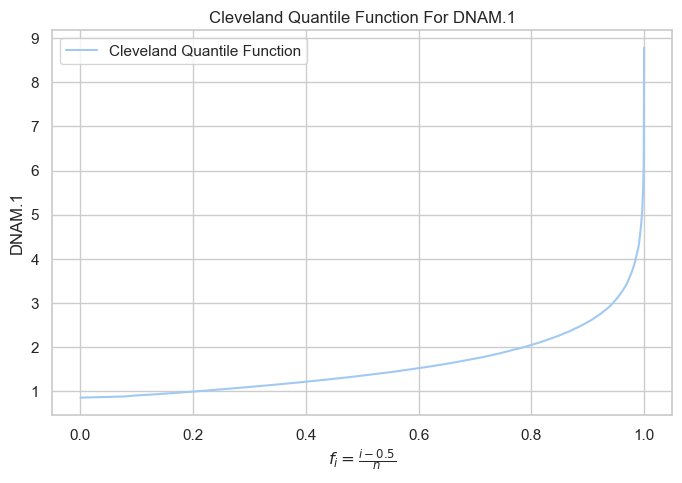

In [112]:
sorted_data = df['DNAM.1'].sort_values()
n = len(sorted_data)

# Assign fractions for each observations
fractions = [(i - 0.5) / n for i in range(1, n + 1)]

plt.figure(figsize=(8, 5))
sns.lineplot(x=fractions, y=sorted_data, markers="o", label="Cleveland Quantile Function")

plt.xlabel(r"$f_i = \frac{i - 0.5}{n}$")
plt.ylabel("DNAM.1")
plt.title("Cleveland Quantile Function For DNAM.1")
plt.grid(True)
plt.legend()
plt.show()

The `Cleveland Quantile Function for DNAM.1` gives us a clear view of distribution of the data under `DNAM.1`:

1. **Range**: Although the exact values remained uncleared, it seems the the values for `DNAM.1` ranges from 1-9 ($range \approx 8$), which is actually one of the columns with highest range (from the range calculations earlier).
2. **Mode**: Looking at the peak of our graph it is clear that a significant portion (~80%) of the graph falls within the lower range or around 1-2 range of `DNAM.1`. This is indicative of a really high peak or kurtosis (let's look at this later).
3. **Outliers**: Also there appear to be a significant dispersion/variance the higher we go up. Notice how beyond the 0.8 $f_i$ the graph explodes upward. That's indicative of high variation in their values, and thus higher amount (and values) of outliers.
4. **Skewness**: Since the dispersion increases the higher the `DNAM.1`, it is also clear that the the data is skewed to the right.

Let us confirm our observations further by plotting both PDF and boxplot.   

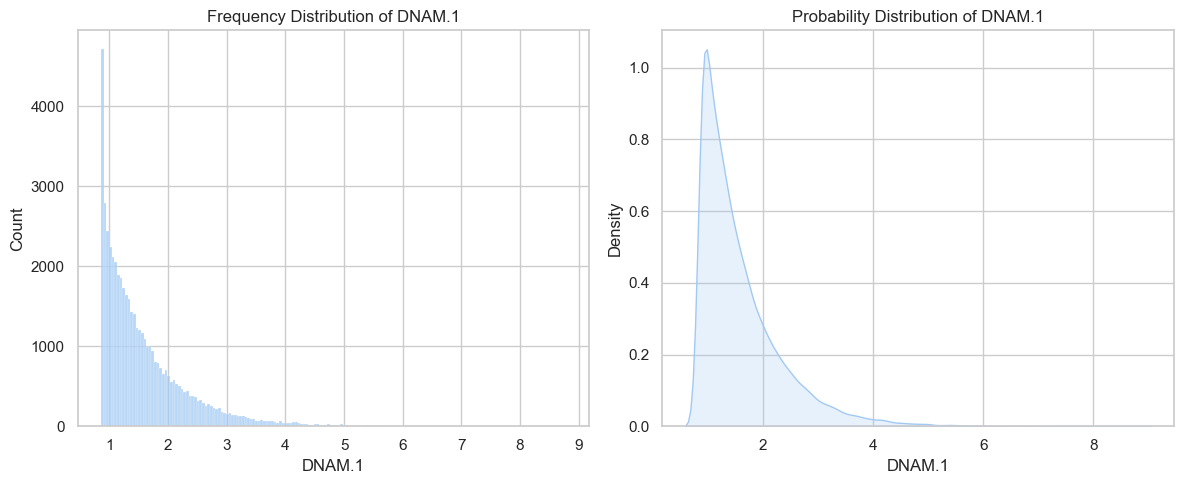

In [120]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['DNAM.1'])
plt.title("Frequency Distribution of DNAM.1")
plt.subplot(1, 2, 2)
sns.kdeplot(df['DNAM.1'], fill=True)
plt.title("Probability Distribution of DNAM.1")

plt.tight_layout() 
plt.show()

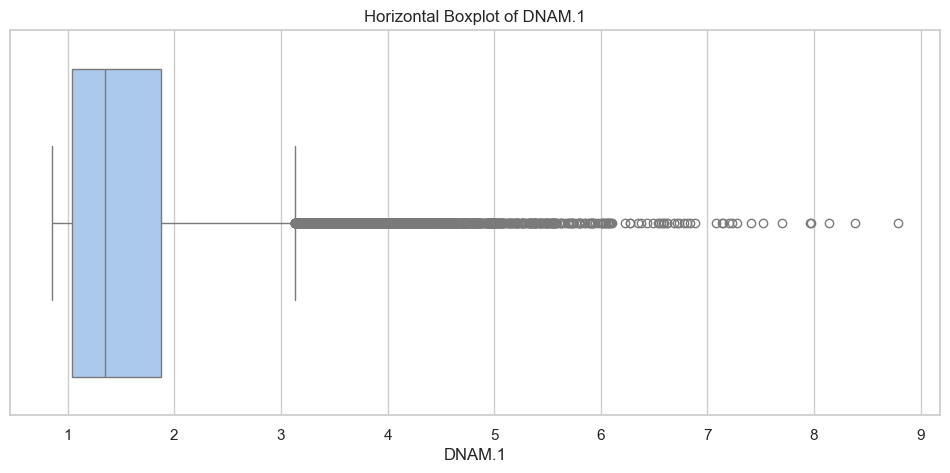

In [123]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['DNAM.1'])
plt.title("Horizontal Boxplot of DNAM.1");

Alright, both the frequency distribution and the boxplot reinforced our interpretations of the `Cleveland Quantile Function`.


#### Additional Observation
Also, it seems that `Cleveland Quantile Function` and `Density Estimate Distribution` are just transposed version of each other! Cool.

## Bivariate Graph
For this part, we shall choose 2 columns and make a **Quantile-QUantile (q-q) plot**. As a criteria, we shall look at the correlation between columns and see if there are interesting relationships between them.  

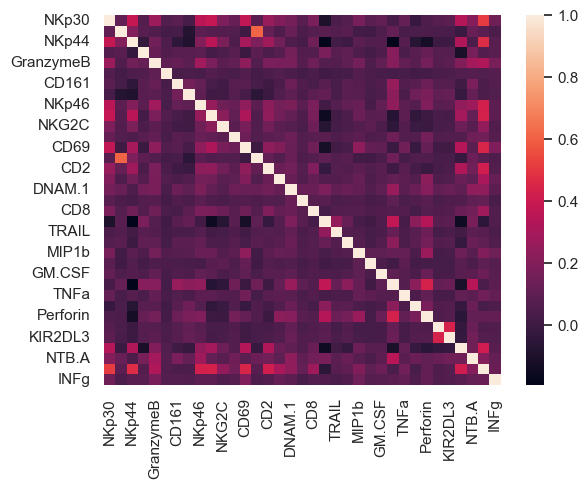

In [127]:
corr = df.corr()
sns.heatmap(corr);

Looking at the heat map, most of them have low to medium correlation. Those are not interesting enough. Although I see one orange glaring but it isn't clear which two combinations of variable are the two so let's flatten our *correlation matrix*.

In [135]:
uns_corr = corr.unstack()
uns_corr = uns_corr[uns_corr != 1] #remove diagonal
uns_corr.sort_values(ascending=False)

KIR3DL1.S1  KIR3DL1       0.611844
KIR3DL1     KIR3DL1.S1    0.611844
NKp30       CD56          0.512283
CD56        NKp30         0.512283
            NKp44         0.470135
                            ...   
NKG2D       CD57         -0.154959
NKp44       CD57         -0.189571
CD57        NKp44        -0.189571
NKp44       CD16         -0.192455
CD16        NKp44        -0.192455
Length: 1190, dtype: float64

`KIR3DL1.S1` and `KIR3DL1` have the highest correlation but their simillarity in column name makes them not appealing to me. So let's go to the next combination which is the `NKp30` and `CD56`

It is fairly easy to create a qq plot of two columns, we just have to sort both columns, standardized them, and put them on a scatter plot. 

Although let us first use visualize a scatter plot between the two variables to widen our perspective.  

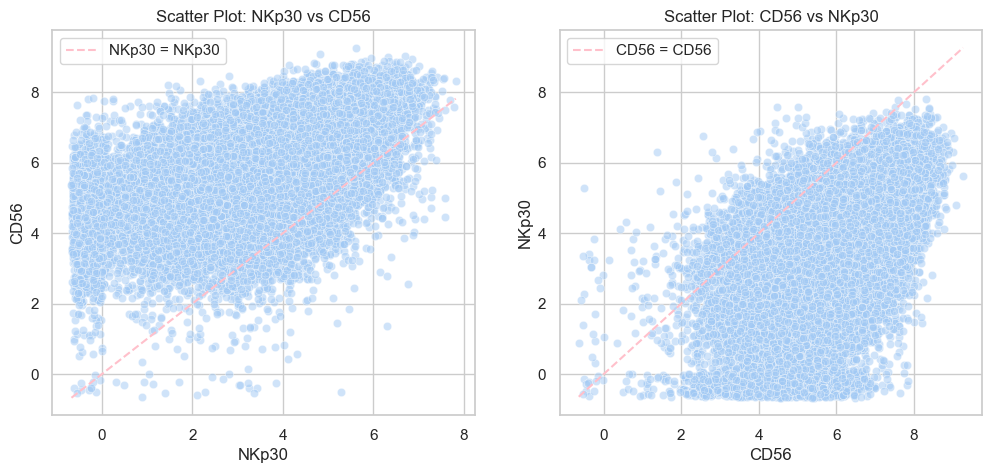

In [182]:
nkp = df['NKp30']
cd = df['CD56']

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.scatterplot(x=nkp, y=cd,alpha=0.5)
sns.lineplot(x=(nkp.min(), nkp.max()), y=(nkp.min(), nkp.max()), color="pink", linestyle="dashed", label="NKp30 = NKp30")
plt.title("Scatter Plot: NKp30 vs CD56");

plt.subplot(1,2,2)
sns.scatterplot(x=cd, y=nkp,alpha=0.5)
sns.lineplot(x=(cd.min(), cd.max()), y=(cd.min(), cd.max()), color="pink", linestyle="dashed", label="CD56 = CD56")
plt.title("Scatter Plot: CD56 vs NKp30");

Looking at the Scatter Plot, it becomes clear that:
1. **Correlation**: there exist a postive correlation between `NKp30` and `CD56` due to it's (roughly) diagonal shape.
2. **Scaling**: In terms of scaling, we can discern the CD56 have higher average values due to most data being pulled towards it's axis.

With regards to their distribution, it's still hard to tell due to different scales. Let's first standardized the two to compare their distribution.

We ought to use *z-scaling*.

$$
Z_{score} = \frac{x - \mu}{\sigma}
$$

where:

$\mu$ is the mean of the column.

$\sigma$ is the standard deviation.

$x$ is the observation values themselves.

*z-scaling* turns $\mu=0$ and $\sigma = 0$ for each columns

In [165]:
nkp_mean, nkp_std =  nkp.mean(), nkp.std()
cd_mean, cd_std =  cd.mean(), cd.std()

nkp_standardized = (nkp - nkp_mean) / nkp_std
cd_standardized = (cd - cd_mean) / cd_std
print(f"NKP: mean={nkp_mean}, std={nkp_std}")
print(f"NKP_standardized: mean={round(nkp_standardized.mean(), 2)}, std={round(nkp_standardized.std(), 2)}")
print(f"CD: mean={cd_mean}, std={cd_std}")
print(f"CD_standardized: mean={round(cd_standardized.mean(), 2)}, std={round(cd_standardized.std(), 2)}")

NKP: mean=3.5948402342699306, std=1.4847323686676126
NKP_standardized: mean=-0.0, std=1.0
CD: mean=5.715326584384476, std=1.1077836889469677
CD_standardized: mean=-0.0, std=1.0


In [177]:
nkp_standardized.mean()

-4.3655745685100557e-16

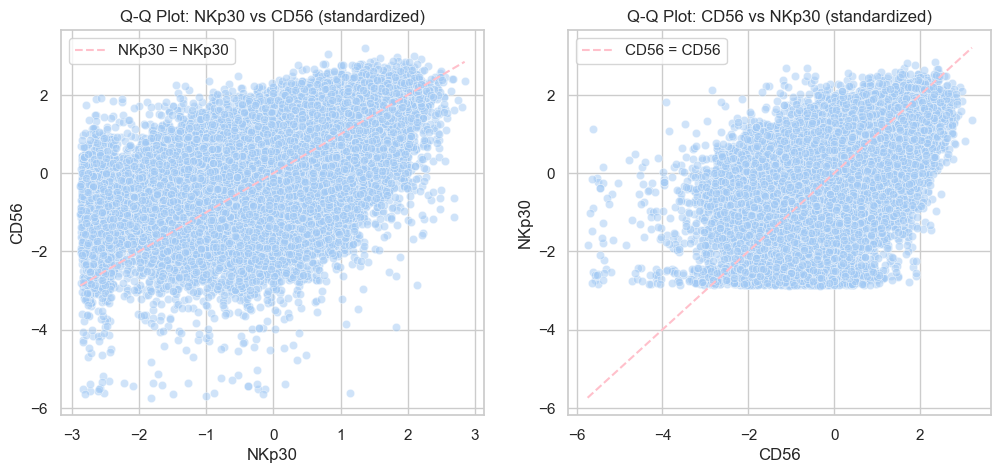

In [196]:
nkp = nkp_standardized.sort_values()
cd = cd_standardized.sort_values()

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.scatterplot(x=nkp, y=cd,alpha=0.5)
sns.lineplot(x=(nkp.min(), nkp.max()), y=(nkp.min(), nkp.max()), color="pink", linestyle="dashed", label="NKp30 = NKp30")

plt.title("Q-Q Plot: NKp30 vs CD56 (standardized)");

plt.subplot(1,2,2)
sns.scatterplot(x=cd, y=nkp,alpha=0.5)
sns.lineplot(x=(cd.min(), cd.max()), y=(cd.min(), cd.max()), color="pink", linestyle="dashed", label="CD56 = CD56")

plt.title("Q-Q Plot: CD56 vs NKp30 (standardized)");

It appears that the difference between the two distribution was highlighted even more in Q-Q plot. 

3. **Dispersion**:  The more spread the data, the more it will deviate from the red line. It is clear that `NKp30` is more concentrated (right plot) while `CD56` looks more dispersed. Implying that although both their standard deviation is equals to one, `CD56` have greater range in terms of values with it being -6 to 3 as opposed to the -3 to 3 of the `NKp30 column`.
4. **Normality**: Looking at the symmetrical distribution from the diagonal lead us to approximate (by eye test) that both have the same distribution (aside from slight dispersion difference), perhaps both are even normal distributions.  
5. **Ourliers and Skewness(?)**: It also appears that `CD56` have some relatively amount of outliers (look at the bottom left of graph on the left). This might flag a possible leftly skewed graph  for the `CD56`.



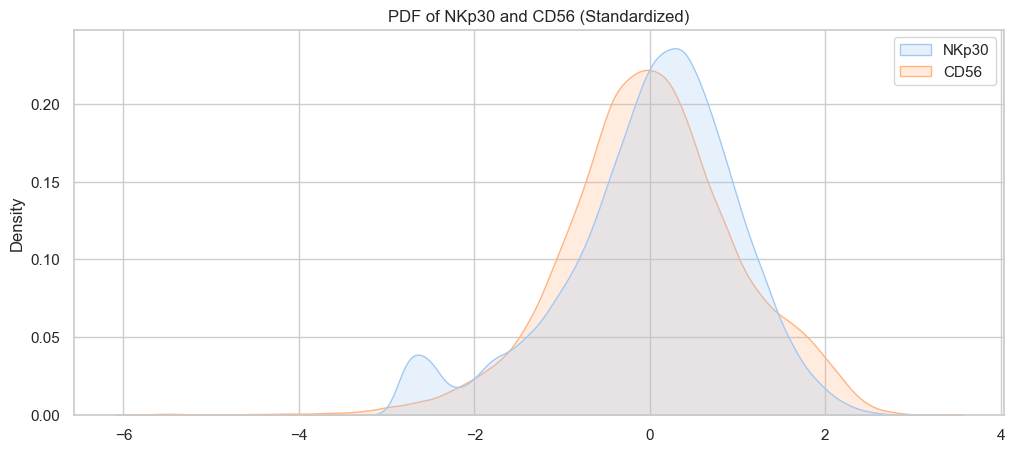

In [201]:
plt.figure(figsize=(12, 5))
sns.kdeplot([nkp, cd], fill=True)
plt.title("PDF of NKp30 and CD56 (Standardized)");